## LOAD, TRANSFORM & PRE-PROCESING (CLEAN)

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Exercici 1

+ Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas 


In [2]:
filename = './dades/DelayedFlights.csv'
with open(filename,'r+') as f:
    data=f.read()
print (data[:500])   

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,,,,,
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,


In [3]:
df = pd.read_csv('./dades/DelayedFlights.csv',delimiter=',')
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


### Exercici 2

* Fes un informe complet del data set:
 - Resumeix estadísticament les columnes d’interès
 - Troba quantes dades faltants hi ha per columna
 -  Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)
 -  Taula de les aerolínies amb més endarreriments acumulats
 -  Quins són els vols més llargs? I els més endarrerits?
    Etc.


In [4]:
df.shape

(1936758, 30)

+ el DataFrame consisten en 1.9M de filas y 30 columnas

In [5]:
# quito la 1a columna
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [6]:
# miro que tipo de datos tengo y cuantos null/na
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1936758 non-null  int64  
 1   Month              1936758 non-null  int64  
 2   DayofMonth         1936758 non-null  int64  
 3   DayOfWeek          1936758 non-null  int64  
 4   DepTime            1936758 non-null  float64
 5   CRSDepTime         1936758 non-null  int64  
 6   ArrTime            1929648 non-null  float64
 7   CRSArrTime         1936758 non-null  int64  
 8   UniqueCarrier      1936758 non-null  object 
 9   FlightNum          1936758 non-null  int64  
 10  TailNum            1936753 non-null  object 
 11  ActualElapsedTime  1928371 non-null  float64
 12  CRSElapsedTime     1936560 non-null  float64
 13  AirTime            1928371 non-null  float64
 14  ArrDelay           1928371 non-null  float64
 15  DepDelay           1936758 non-n

In [7]:
# miro donde tengo los null values
df.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [8]:
# miro el porcentaje (%) de null values
(df.isnull().sum()/len(df)*100).round(1)

Year                  0.0
Month                 0.0
DayofMonth            0.0
DayOfWeek             0.0
DepTime               0.0
CRSDepTime            0.0
ArrTime               0.4
CRSArrTime            0.0
UniqueCarrier         0.0
FlightNum             0.0
TailNum               0.0
ActualElapsedTime     0.4
CRSElapsedTime        0.0
AirTime               0.4
ArrDelay              0.4
DepDelay              0.0
Origin                0.0
Dest                  0.0
Distance              0.0
TaxiIn                0.4
TaxiOut               0.0
Cancelled             0.0
CancellationCode      0.0
Diverted              0.0
CarrierDelay         35.6
WeatherDelay         35.6
NASDelay             35.6
SecurityDelay        35.6
LateAircraftDelay    35.6
dtype: float64

In [9]:
# descripcion estadistica de TODAS las columnas con valores numericos (int o float) o objectos
df.describe(include='all').round(1)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.0,1936758.0,1936758.0,1936758.0,1936758.0,1936758.0,1929648.0,1936758.0,1936758,1936758.0,1936753,1928371.0,1936560.0,1928371.0,1928371.0,1936758.0,1936758,1936758,1936758.0,1929648.0,1936303.0,1936758.0,1936758,1936758.0,1247488.0,1247488.0,1247488.0,1247488.0,1247488.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,5366,NaN,NaN,NaN,NaN,NaN,303,304,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WN,NaN,N325SW,NaN,NaN,NaN,NaN,NaN,ATL,ORD,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,377602,NaN,965,NaN,NaN,NaN,NaN,NaN,131613,108984,NaN,NaN,NaN,NaN,1936125,NaN,NaN,NaN,NaN,NaN,NaN
mean,2008.0,6.1,15.8,4.0,1518.5,1467.5,1610.1,1634.2,NaN,2184.3,NaN,133.3,134.3,108.3,42.2,43.2,NaN,NaN,765.7,6.8,18.2,0.0,NaN,0.0,19.2,3.7,15.0,0.1,25.3
std,0.0,3.5,8.8,2.0,450.5,424.8,548.2,464.6,NaN,1944.7,NaN,72.1,71.3,68.6,56.8,53.4,NaN,NaN,574.5,5.3,14.3,0.0,NaN,0.1,43.5,21.5,33.8,2.0,42.1
min,2008.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,NaN,1.0,NaN,14.0,-25.0,0.0,-109.0,6.0,NaN,NaN,11.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
25%,2008.0,3.0,8.0,2.0,1203.0,1135.0,1316.0,1325.0,NaN,610.0,NaN,80.0,82.0,58.0,9.0,12.0,NaN,NaN,338.0,4.0,10.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
50%,2008.0,6.0,16.0,4.0,1545.0,1510.0,1715.0,1705.0,NaN,1543.0,NaN,116.0,116.0,90.0,24.0,24.0,NaN,NaN,606.0,6.0,14.0,0.0,NaN,0.0,2.0,0.0,2.0,0.0,8.0
75%,2008.0,9.0,23.0,6.0,1900.0,1815.0,2030.0,2014.0,NaN,3422.0,NaN,165.0,165.0,137.0,56.0,53.0,NaN,NaN,998.0,8.0,21.0,0.0,NaN,0.0,21.0,0.0,15.0,0.0,33.0


Text(0, 0.5, '% transacciones')

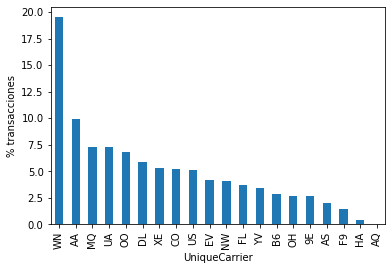

In [10]:
# hago un plot para ver el % de vuelos de las diferentes compañias
df2plot = df.UniqueCarrier.value_counts(dropna=True,ascending=False)/len(df)*100
df2plot.plot.bar()
plt.xlabel('UniqueCarrier')
plt.ylabel('% transacciones')

In [11]:
print(df2plot[:10].sum().round(2))
# las 10 'UniqueCarrier'que contabilizan mas vuelos representan el 76% de todos los datos

76.6


Text(0, 0.5, 'Occurences')

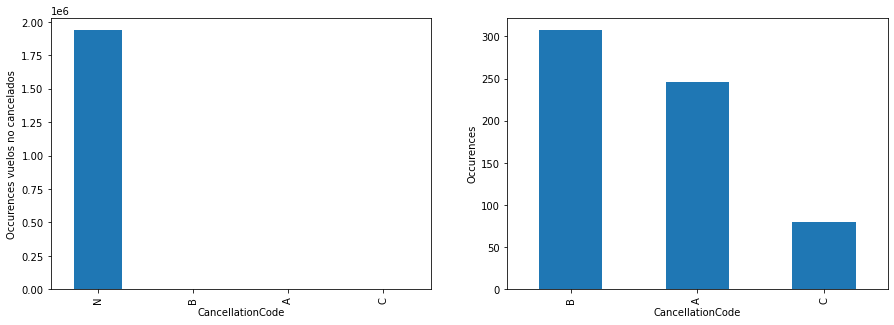

In [12]:
fig,ax = plt.subplots(ncols=2,sharey=False,figsize=(15,5))
df_plot =df.CancellationCode.value_counts(ascending=False)
df_plot.plot.bar(ax=ax[0])
ax[0].set_xlabel('CancellationCode')
ax[0].set_ylabel('Occurences vuelos no cancelados')
df_plot=df_plot.loc['B':]
df_plot.plot.bar(ax=ax[1])
plt.xlabel('CancellationCode')
plt.ylabel('Occurences')

pocas occurencias con cancelation tipo B, A o C

In [13]:
df_subset=df[df.CancellationCode =='A'] #reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
df_subset.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1542406,2008,10,27,1,1622.0,1420,NaN,1520,WN,27,N601WN,NaN,60.0,NaN,NaN,122.0,HOU,HRL,276,NaN,19.0,1,A,0,NaN,NaN,NaN,NaN,NaN
1550787,2008,10,5,7,1711.0,1653,NaN,1821,YV,7148,N570ML,NaN,88.0,NaN,NaN,18.0,IAD,TYS,419,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
1554099,2008,10,28,2,1735.0,1410,NaN,1529,YV,7262,N571ML,NaN,79.0,NaN,NaN,205.0,SYR,IAD,296,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
1554263,2008,10,30,4,2221.0,1848,NaN,2112,YV,7281,N514MJ,NaN,204.0,NaN,NaN,213.0,IAD,AUS,1297,NaN,12.0,1,A,0,NaN,NaN,NaN,NaN,NaN
1561026,2008,10,14,2,1050.0,1038,NaN,1230,OO,6017,N698BR,NaN,112.0,NaN,NaN,12.0,ICT,ORD,588,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


In [14]:
df1=df.copy()

In [15]:
days={1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}

In [16]:
# convierto la columna 'DaysOfWeek' de valor numerico a objeto
df1.DayOfWeek=df1.DayOfWeek.map(days)

In [17]:
# convierto datos de estas columnas a strings
df1.Year = df1.Year.astype(str)
df1.Month = df1.Month.astype(str)
df1.DayofMonth =df1.DayofMonth.astype(str)
#aplico esta funcion para asegurarme que tengo un Zero delante de un numero si solo tengo 1 numero
# quiero tener 05 si solo tengo el numero 5
df1['Month']=df1['Month'].str.zfill(2)
df1['DayofMonth']=df1['DayofMonth'].str.zfill(2)

In [18]:
# creo una nuevo columna 'Date' que consiste en el año/mes/dia
df1['Date']=df1.Year+'-'+df1.Month+'-'+df1.DayofMonth

In [19]:
# convierto la columna 'Date' a formato de tiempo
df1.Date = pd.to_datetime(df1['Date'])

In [20]:
# borro estas 3 columnas y creo un nuevo dataframe
df2 = df1.drop(['Year','Month','DayofMonth'],axis=1)

In [21]:
df2.head(2)

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,Thursday,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,Thursday,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03


In [22]:
# Quiero poner la columna "Date" delante del resto
col_name='Date'
date_col = df2.pop(col_name)
df2.insert(0, 'Date', date_col)
df2.head(2)

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,Thursday,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008-01-03,Thursday,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [23]:
# funcion para convertir las columns que son int /float y que deberian tener formato de HH:MM 24h de 0 a 23h
def convert(x):
    try:
        val = str(int(x)).zfill(4)
        if val[0:2] == '24':
            val = val.replace('24','00')
        return val[0:2] + ":" + val[2:4]        
    except ValueError:
        return np.nan
    
# ejemplo
convert(2401)    

'00:01'

In [24]:
time_columns = ['DepTime','CRSDepTime','ArrTime','CRSArrTime']

In [25]:
# ejecutar funcion para estas 4 columnas
for col in time_columns:
    df2[col]=df2[col].apply(convert)     

In [26]:
df2[time_columns].head(3)

,DepTime,CRSDepTime,ArrTime,CRSArrTime
0,20:03,19:55,22:11,22:25
1,07:54,07:35,10:02,10:00
2,06:28,06:20,08:04,07:50


In [27]:
df2[time_columns].describe()

,DepTime,CRSDepTime,ArrTime,CRSArrTime
count,1936758,1936758,1929648,1936758
unique,1438,1207,1440,1363
top,18:00,18:00,21:00,19:30
freq,3188,13925,2982,9187


In [28]:
# miro que columnas tienen valores nulos de nuevo
df2[time_columns].isnull().sum()

DepTime          0
CRSDepTime       0
ArrTime       7110
CRSArrTime       0
dtype: int64

In [29]:
df2[df2.ArrTime.isnull()].head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1280,2008-01-03,Thursday,09:22,09:15,NaN,10:50,WN,1069,N630WN,NaN,95.0,NaN,NaN,7.0,SAN,SMF,480,NaN,12.0,0,N,1,NaN,NaN,NaN,NaN,NaN
1372,2008-01-03,Thursday,23:25,19:00,NaN,20:30,WN,2092,N302SW,NaN,90.0,NaN,NaN,265.0,SFO,SAN,447,NaN,11.0,0,N,1,NaN,NaN,NaN,NaN,NaN
1776,2008-01-04,Friday,19:49,19:05,NaN,19:10,WN,1403,N504SW,NaN,65.0,NaN,NaN,44.0,BOI,RNO,335,NaN,11.0,0,N,1,NaN,NaN,NaN,NaN,NaN
1831,2008-01-04,Friday,07:37,07:05,NaN,08:25,WN,178,N718SW,NaN,80.0,NaN,NaN,32.0,BUR,SMF,358,NaN,13.0,0,N,1,NaN,NaN,NaN,NaN,NaN
2244,2008-01-04,Friday,18:49,16:30,NaN,17:55,WN,239,N636WN,NaN,85.0,NaN,NaN,139.0,LAS,RNO,345,NaN,12.0,0,N,1,NaN,NaN,NaN,NaN,NaN


+ Cancelled Flight Indicator (1=Yes)
+ Diverted Flight Indicator (1=Yes)
+ el vuelo no ha sido cancelado pero si desviado
+ no todos los vuelos desviados sufren de 'ArrTime' con np.nan
+ como no hay constancia del registro de llegada no podemos tampoco inferir un valor
+ borraré los null values

In [30]:
df2[df2.TailNum.isnull()]

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
433449,2008-03-21,Friday,13:33,13:20,NaN,14:28,OH,5338,NaN,NaN,68.0,NaN,NaN,13.0,CVG,GRR,268,NaN,16.0,0,N,1,NaN,NaN,NaN,NaN,NaN
523748,2008-03-18,Tuesday,17:16,16:55,20:36,19:47,9E,3760,NaN,140.0,112.0,100.0,49.0,21.0,DSM,DTW,534,11.0,29.0,0,N,0,0.0,0.0,28.0,0.0,21.0
773772,2008-05-08,Thursday,15:45,15:30,17:11,17:07,OH,5043,NaN,86.0,97.0,66.0,4.0,15.0,CVG,CHS,497,5.0,15.0,0,N,0,NaN,NaN,NaN,NaN,NaN
776480,2008-05-31,Saturday,17:20,12:44,19:20,14:27,OH,5396,NaN,120.0,103.0,72.0,293.0,276.0,RDU,JFK,426,8.0,40.0,0,N,0,0.0,276.0,17.0,0.0,0.0
1309410,2008-08-02,Saturday,18:40,13:05,NaN,14:38,OH,5731,NaN,NaN,93.0,NaN,NaN,335.0,RDU,ATL,356,NaN,6.0,0,N,1,NaN,NaN,NaN,NaN,NaN


In [31]:
# borro observaciones tanto de ArrTime como de TailNum
df3=df2.dropna(subset=['ArrTime','TailNum'],how='any',axis=0)

In [32]:
# miro que columnas tienen valores nulos
df3.isnull().sum()

Date                      0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   0
ActualElapsedTime      1277
CRSElapsedTime            0
AirTime                1277
ArrDelay               1277
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         682159
WeatherDelay         682159
NASDelay             682159
SecurityDelay        682159
LateAircraftDelay    682159
dtype: int64

In [33]:
seleccion_columnas = ['ActualElapsedTime','AirTime','ArrDelay']

In [34]:
df3[df3['ActualElapsedTime'].isnull()].tail()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1934369,2008-12-07,Sunday,19:28,16:45,00:29,20:32,DL,133,N3764D,NaN,407.0,NaN,NaN,163.0,JFK,SFO,2586,6.0,45.0,0,N,1,NaN,NaN,NaN,NaN,NaN
1934921,2008-12-09,Tuesday,19:57,19:05,00:22,20:13,DL,792,N3739P,NaN,128.0,NaN,NaN,52.0,ATL,ORD,606,35.0,25.0,0,N,1,NaN,NaN,NaN,NaN,NaN
1935596,2008-12-10,Wednesday,07:14,06:40,11:53,08:59,DL,1610,N956DL,NaN,79.0,NaN,NaN,34.0,JAN,ATL,341,16.0,10.0,0,N,1,NaN,NaN,NaN,NaN,NaN
1935716,2008-12-11,Thursday,13:55,11:06,00:07,19:50,DL,26,N3747D,NaN,344.0,NaN,NaN,169.0,LAX,JFK,2475,13.0,17.0,0,N,1,NaN,NaN,NaN,NaN,NaN
1935978,2008-12-11,Thursday,15:27,15:20,21:06,17:08,DL,1102,N924DL,NaN,108.0,NaN,NaN,7.0,IAD,ATL,533,9.0,19.0,0,N,1,NaN,NaN,NaN,NaN,NaN


In [35]:
# quitamos estos datos porque queremos inferir en tiempos de vuelo y retrasos respecto al tiempo estimado
df4=df3.dropna(subset=seleccion_columnas,how='any',axis=0)

In [36]:
df4.isnull().sum()

Date                      0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   0
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         680882
WeatherDelay         680882
NASDelay             680882
SecurityDelay        680882
LateAircraftDelay    680882
dtype: int64

In [37]:
seleccion_columnas = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']

In [38]:
df4[df4.CarrierDelay.isnull()].head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,Thursday,20:03,19:55,22:11,22:25,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008-01-03,Thursday,07:54,07:35,10:02,10:00,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008-01-03,Thursday,06:28,06:20,08:04,07:50,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008-01-03,Thursday,19:40,19:15,21:21,21:10,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
6,2008-01-03,Thursday,07:06,07:00,09:16,09:15,WN,100,N690SW,130.0,135.0,106.0,1.0,6.0,IND,MCO,828,5.0,19.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [39]:
# todos los vuelos del df4 NO han sido desviados
df4.Diverted.unique()

array([0])

+ voy a filtrar los vuelos que no tienen delay

In [40]:
subset = df4[df4.CarrierDelay.isnull()]
sin_delay_subset = subset.ActualElapsedTime < subset.CRSElapsedTime
subset[sin_delay_subset]

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,Thursday,20:03,19:55,22:11,22:25,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008-01-03,Thursday,07:54,07:35,10:02,10:00,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008-01-03,Thursday,19:40,19:15,21:21,21:10,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
6,2008-01-03,Thursday,07:06,07:00,09:16,09:15,WN,100,N690SW,130.0,135.0,106.0,1.0,6.0,IND,MCO,828,5.0,19.0,0,N,0,NaN,NaN,NaN,NaN,NaN
10,2008-01-03,Thursday,07:54,07:45,09:40,09:55,WN,1144,N778SW,226.0,250.0,205.0,-15.0,9.0,IND,PHX,1489,5.0,16.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936739,2008-12-13,Saturday,11:00,10:45,13:50,13:47,DL,1530,N920DL,110.0,122.0,91.0,3.0,15.0,MCI,ATL,692,7.0,12.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1936740,2008-12-13,Saturday,12:00,11:50,19:24,19:21,DL,1538,N6710E,264.0,271.0,238.0,3.0,10.0,PDX,ATL,2172,11.0,15.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1936750,2008-12-13,Saturday,15:31,15:22,18:22,18:23,DL,1612,N916DN,111.0,121.0,88.0,-1.0,9.0,MCI,ATL,692,9.0,14.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1936756,2008-12-13,Saturday,12:51,12:40,14:46,14:37,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


+ si los vuelos no tienen delay estos retrasos deberian estar a Cero

In [41]:
sin_delay = df4.ActualElapsedTime <= df4.CRSElapsedTime
con_delay = df4.ActualElapsedTime > df4.CRSElapsedTime

In [42]:
df_vuelos_sin_retraso = df4[sin_delay]
df_vuelos_con_retraso = df4[con_delay]

In [43]:
# vamos a asumir que los nuevos valores es Zero para los vuelos sin retraso
df_vuelos_sin_retraso =df_vuelos_sin_retraso.fillna(0)
# vamos a eliminar los Null de los vuelos con retraso porque no sabemos a que es debido el retraso
df_vuelos_con_retraso =df_vuelos_con_retraso.dropna(subset=seleccion_columnas,how='any',axis=0)

In [44]:
# combinar el df limpio de null values
df_clean= df_vuelos_sin_retraso.append(df_vuelos_con_retraso)

In [45]:
# escojo las siguientes columnas para eliminar del DataFrame ya que parese que no son de utilidad
# al final el dataset va a tener alguna columna con dtype = 'Objects' y aquellas con valores numericos
clean_cols = df_clean.columns.drop(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime','FlightNum','Cancelled','CancellationCode','Diverted'])
print(clean_cols)

Index(['Date', 'DayOfWeek', 'UniqueCarrier', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


In [46]:
df_output= df_clean[clean_cols]

In [47]:
# miro aquellos valores donde el AirTime is Zero
# no es posible que el AirTime sea Zero si el vuelo no ha sido cancelado
df_output[df_output.AirTime==0.0].sort_index()

,Date,DayOfWeek,UniqueCarrier,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
53543,2008-01-05,Saturday,OO,N581SW,98.0,78.0,0.0,118.0,98.0,SGU,SLC,269,96.0,2.0,0.0,0.0,0.0,0.0,118.0
54342,2008-01-06,Sunday,OO,N581SW,93.0,56.0,0.0,104.0,67.0,TWF,SLC,175,90.0,3.0,0.0,104.0,0.0,0.0,0.0
245633,2008-02-12,Tuesday,OO,N763SK,170.0,164.0,0.0,183.0,177.0,ASE,ORD,1013,8.0,162.0,0.0,0.0,183.0,0.0,0.0
414132,2008-03-31,Monday,XE,N14562,144.0,130.0,0.0,24.0,10.0,MSY,MCI,690,4.0,140.0,0.0,0.0,24.0,0.0,0.0
441835,2008-03-18,Tuesday,OO,N765SK,153.0,164.0,0.0,97.0,108.0,ASE,ORD,1013,12.0,141.0,0.0,0.0,97.0,0.0,0.0
784702,2008-05-27,Tuesday,OO,N271YV,28.0,45.0,0.0,-2.0,15.0,SAN,LAX,109,25.0,3.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# miramos los indices donde el valor de AirTime is Zero
indices = df_output[df_output['AirTime'] == 0.0 ].index
print(indices)
# elimino estos indice en particular
df_output.drop(indices, inplace = True) 

Int64Index([441835, 784702, 53543, 54342, 245633, 414132], dtype='int64')


/home/vant/.local/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
df_output.to_csv('./dades/DelayFlights_clean.csv')

## DATA TRANSFORMATION (PRE-PROCESSING)

In [50]:
df = pd.read_csv('./dades/DelayFlights_clean.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

#### LOAD CARRIERS DATA

In [51]:
df_carriers = pd.read_csv('./dades/carriers.csv',index_col='Code') # 
carriers_dict={}
for code in df_carriers.index.unique():
    carriers_dict[code]=df_carriers.loc[code]['Description']

In [52]:
df.head()

,Date,DayOfWeek,UniqueCarrier,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,Thursday,WN,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0.0,0.0,0.0,0.0,0.0
1,2008-01-03,Thursday,WN,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0.0,0.0,0.0,0.0,0.0
2,2008-01-03,Thursday,WN,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
3,2008-01-03,Thursday,WN,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0.0,0.0,0.0,0.0,0.0
4,2008-01-03,Thursday,WN,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,10.0,0.0,0.0,0.0,47.0


In [53]:
df_carriers.head()

,Description
Code,
02Q,Titan Airways
04Q,Tradewind Aviation
05Q,"Comlux Aviation, AG"
06Q,Master Top Linhas Aereas Ltd.
07Q,Flair Airlines Ltd.


In [54]:
df['Velocidad (Millas/hora)'] = df['Distance']/(df['AirTime']/60) 
df['retard'] = df.ActualElapsedTime - df.CRSElapsedTime 
df.head()

,Date,DayOfWeek,UniqueCarrier,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Velocidad (Millas/hora),retard
0,2008-01-03,Thursday,WN,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0.0,0.0,0.0,0.0,0.0,418.965517,-22.0
1,2008-01-03,Thursday,WN,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0.0,0.0,0.0,0.0,0.0,430.088496,-17.0
2,2008-01-03,Thursday,WN,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0,401.298701,0.0
3,2008-01-03,Thursday,WN,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0.0,0.0,0.0,0.0,0.0,474.482759,-14.0
4,2008-01-03,Thursday,WN,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,10.0,0.0,0.0,0.0,47.0,415.043478,-10.0


grafica con la velocidad media por Carrier de todos sus vuelos

Text(0.5, 1.0, 'media de velocidad de todos los vuelos realizados por cada carrier')

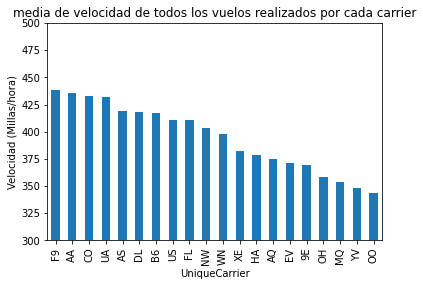

In [56]:
df_sorted = df.groupby('UniqueCarrier')['Velocidad (Millas/hora)'].mean().sort_values(ascending=False)
df_sorted.plot.bar()# unique carriers with longest accumulated distances
plt.ylim([300,500])
plt.ylabel('Velocidad (Millas/hora)')
plt.title('media de velocidad de todos los vuelos realizados por cada carrier')

In [57]:
# lista de los Carriers con la velocidad media mas alta
for carrier in ['F9','AA','CO','UA','AS','DL']:
    a = df_carriers.loc[carrier]['Description']
    print(a)

Frontier Airlines Inc.
American Airlines Inc.
Continental Air Lines Inc.
United Air Lines Inc.
Alaska Airlines Inc.
Delta Air Lines Inc.


In [58]:
df.head()

,Date,DayOfWeek,UniqueCarrier,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Velocidad (Millas/hora),retard
0,2008-01-03,Thursday,WN,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0.0,0.0,0.0,0.0,0.0,418.965517,-22.0
1,2008-01-03,Thursday,WN,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0.0,0.0,0.0,0.0,0.0,430.088496,-17.0
2,2008-01-03,Thursday,WN,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0,401.298701,0.0
3,2008-01-03,Thursday,WN,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0.0,0.0,0.0,0.0,0.0,474.482759,-14.0
4,2008-01-03,Thursday,WN,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,10.0,0.0,0.0,0.0,47.0,415.043478,-10.0


In [59]:
df['Distance'].sort_values(ascending=False)

1111793    4962
344201     4962
344196     4962
899318     4962
344197     4962
           ... 
1704906      30
1413846      24
32036        24
828394       11
484625       11
Name: Distance, Length: 1857423, dtype: int64

<AxesSubplot:xlabel='UniqueCarrier', ylabel='ArrDelay'>

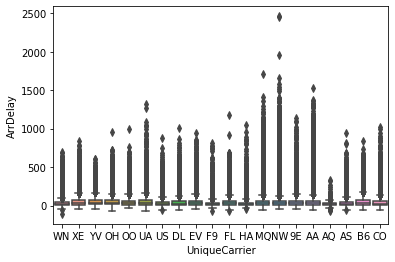

In [60]:
sns.boxplot(data=df, x="UniqueCarrier", y="ArrDelay")

+ Hay muchos outliers en los datos

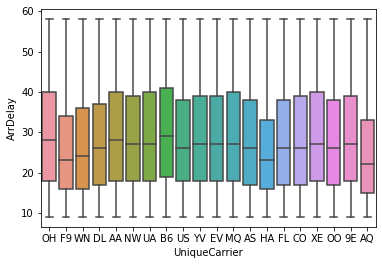

In [61]:
df_no_outliers = df[df['ArrDelay'].between(df['ArrDelay'].quantile(.25), df['ArrDelay'].quantile(.75), inclusive=True)]
plot1= sns.boxplot(data=df_no_outliers.sort_values(by='ArrDelay',ascending=False), x="UniqueCarrier", y="ArrDelay")
plot1.figure.savefig('Arr_delay_plot.png')

Text(0, 0.5, 'ArrDelay in minutes')

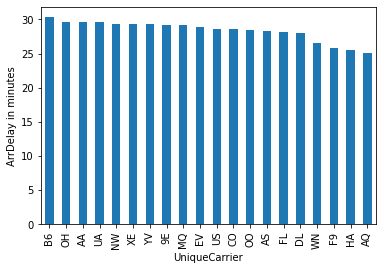

In [62]:
df_grouped = df_no_outliers.groupby('UniqueCarrier')
df_grouped['ArrDelay'].mean().sort_values(ascending=False).plot.bar()
plt.ylabel('ArrDelay in minutes')

<AxesSubplot:xlabel='UniqueCarrier', ylabel='retard'>

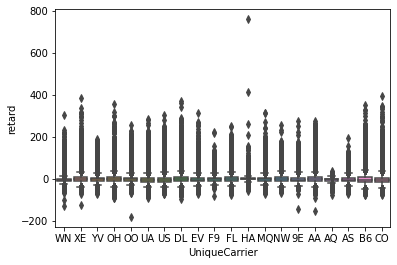

In [63]:
sns.boxplot(data=df,x='UniqueCarrier',y='retard')

<AxesSubplot:xlabel='UniqueCarrier', ylabel='retard'>

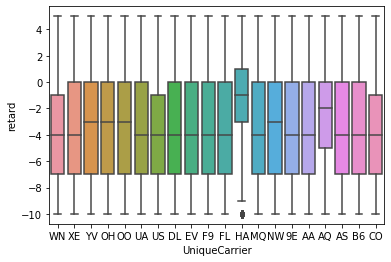

In [64]:
df_filter = df[df['retard'].between(df['retard'].quantile(.25), df['retard'].quantile(.75), inclusive=True)]
sns.boxplot(data=df_filter, x="UniqueCarrier", y="retard")

- Taula de les aerolínies amb més endarreriments acumulats

In [65]:
df_filter.groupby('UniqueCarrier')['retard'].mean().sort_values()

UniqueCarrier
WN   -4.010556
US   -3.799464
CO   -3.759349
UA   -3.643894
9E   -3.578535
MQ   -3.415405
EV   -3.395212
XE   -3.382172
B6   -3.337496
AA   -3.333863
F9   -3.314002
AS   -3.290088
DL   -3.275852
FL   -3.258678
OO   -3.232899
YV   -3.071439
NW   -3.063145
OH   -2.976063
AQ   -2.430493
HA   -1.126291
Name: retard, dtype: float64

+ Quins són els vols més llargs? I els més endarrerits?

<AxesSubplot:xlabel='UniqueCarrier', ylabel='Distance'>

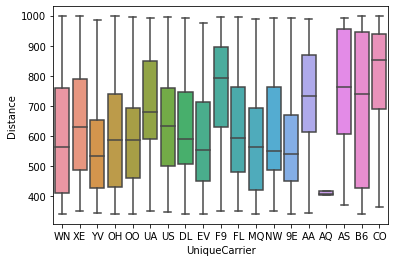

In [66]:
df_filter = df[df['Distance'].between(df['Distance'].quantile(.25), df['Distance'].quantile(.75), inclusive=True)]
sns.boxplot(data=df_filter, x="UniqueCarrier", y="Distance")

In [67]:
df_filter.sort_values(by='Distance',ascending=False)

,Date,DayOfWeek,UniqueCarrier,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Velocidad (Millas/hora),retard
1179093,2008-12-02,Tuesday,WN,N391SW,160.0,175.0,145.0,-9.0,6.0,BWI,MSY,998,3.0,12.0,0.0,0.0,0.0,0.0,0.0,412.965517,-15.0
668435,2008-06-23,Monday,CO,N35260,177.0,199.0,126.0,80.0,102.0,TPA,EWR,998,23.0,28.0,0.0,0.0,80.0,0.0,0.0,475.238095,-22.0
667997,2008-06-29,Sunday,CO,N52616,161.0,167.0,137.0,68.0,74.0,TPA,EWR,998,9.0,15.0,68.0,0.0,0.0,0.0,0.0,437.080292,-6.0
1649168,2008-07-23,Wednesday,B6,N659JB,205.0,174.0,134.0,157.0,126.0,EWR,TPA,998,2.0,69.0,126.0,0.0,31.0,0.0,0.0,446.865672,31.0
446712,2008-04-28,Monday,CO,N14308,153.0,166.0,127.0,63.0,76.0,TPA,EWR,998,6.0,20.0,0.0,0.0,63.0,0.0,0.0,471.496063,-13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219948,2008-02-27,Wednesday,B6,N198JB,110.0,114.0,71.0,2.0,6.0,JFK,PIT,340,9.0,30.0,0.0,0.0,0.0,0.0,0.0,287.323944,-4.0
1721667,2008-09-05,Friday,B6,N292JB,120.0,107.0,66.0,29.0,16.0,JFK,PIT,340,2.0,52.0,16.0,0.0,13.0,0.0,0.0,309.090909,13.0
219734,2008-02-24,Sunday,B6,N265JB,100.0,102.0,65.0,53.0,55.0,PIT,JFK,340,5.0,30.0,53.0,0.0,0.0,0.0,0.0,313.846154,-2.0
1223610,2008-12-03,Wednesday,B6,N179JB,105.0,115.0,74.0,23.0,33.0,JFK,PIT,340,4.0,27.0,23.0,0.0,0.0,0.0,0.0,275.675676,-10.0


<AxesSubplot:xlabel='ArrDelay', ylabel='DepDelay'>

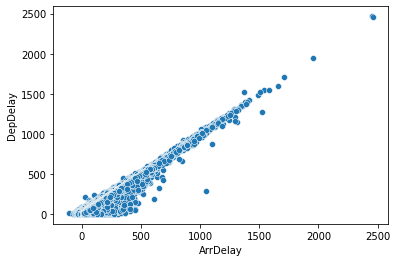

In [68]:
sns.scatterplot(x="ArrDelay", y="DepDelay", data=df)

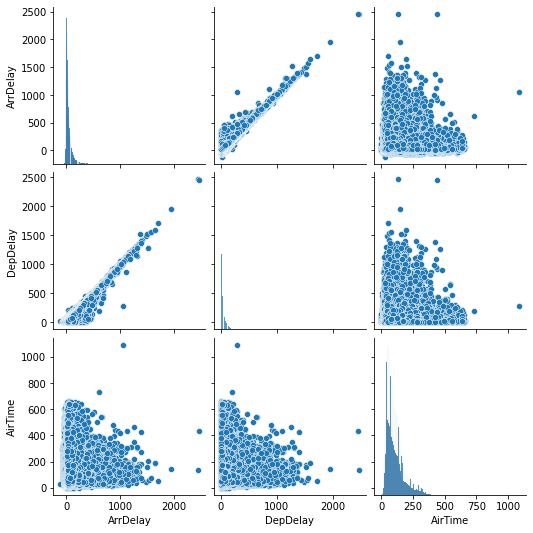

In [69]:
sns.pairplot(df[['ArrDelay', 'DepDelay', 'AirTime']])

In [70]:
df_output.to_excel("./dades/clean_data.xlsx")

ValueError: This sheet is too large! Your sheet size is: 1857423, 19 Max sheet size is: 1048576, 16384

*para poder salver el fichero en un XLSX tendriamos que limpiar los datos mas ya que el numero de filas maximos no deber sobrepasar los 1048576*